# Resource Driven Cooperation

Inspirational systems: Tribal trade or biological cellular cooperation driven by resource heterogeneity. Our hypothesis is the cooperation only occurs when resource availability is in a goldilocks zone between regimes of resource scarcity when selfish actions are likely preferential and high resource abundance when cooperation is not necessitated.

### Question: 
Do there exist features of cooperation that are expressed in both biological and social systems?

### Approach: 
ABM inspired from Evolution of cooperative strategies from first
principles - Mikhail Burtsev & Peter Turchin

Agents have neural net that dictates their decision making process for each step. Actions dictated by ‘brain’ neural net include steal resource, trade, move, and pickup resource. NN weights are updated Agents also randomly reproduce, dividing resources between themselves and offspring placed in free neighboring location.

ToDo:
Explore effects of different topologies (2D/3D grids, random networks)
Experiment with resource distribution methods across agents’ world
Explore the effects of multiple resource types
Study literature to guide variable tuning
Memory - it seems necessary in both biological and social systems for the agents to have a memory of past actions in order to incentivize cooperation.
Communication between modelers and bio/social practitioners



# ToDo List:
1. spatial nodes class
2. agents class
    1. Coding Actions
3. resource distribution function(s)
4. Iteration of simulation
5. Data collection + vis

In [1]:
from coop import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
import matplotlib.animation as animation
%matplotlib inline

In [2]:
#### Generate grid
width = 20
height = 20
grid = createRectangleGrid(width, height)

In [3]:
### Generate some individuals
agentList = []
popSize = 100
for i in range(popSize):
    rx = np.random.randint(0, width)
    ry = np.random.randint(0, height)
    while(grid[rx][ry].agentHere != None):
        rx = np.random.randint(0, width)
        ry = np.random.randint(0, height)
    a = Agent(rx, ry, 2)
    grid[rx][ry].agentHere = a
    a.nodeAt = grid[rx][ry]
    a.randomizeBrain()
    agentList.append(a)

In [4]:
print(len(agentList))

100


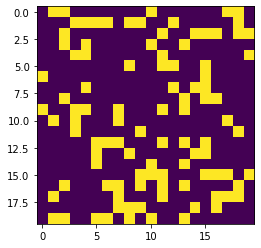

In [5]:
### visualize grid
image = np.zeros((width, height))
for i in range(width):
    for j in range(width):
        if(grid[i][j].agentHere != None):
            image[i,j] = 1
plt.figure()
plt.imshow(image)
plt.show()

In [12]:
for a in agentList:
    print(a)

[None, 3]
[None, 2]
[None, 2]
[None, 1]
[None, 4]
[None, 3]
[None, 2]
[None, 3]
[None, 3]
[None, 3]
[None, 1]
[None, 2]
[None, 1]
[None, 1]
[None, 2]
[None, 3]
[None, 2]
[None, 3]
[None, 1]
[None, 3]
[None, 3]
[None, 3]
[None, 2]
[None, 1]
[None, 1]
[None, 3]
[None, 2]
[None, 0]
[None, 2]
[None, 2]
[None, 1]
[None, 2]
[None, 1]
[None, 2]
[None, 1]
[None, 2]
[None, 2]
[None, 2]
[None, 1]
[None, 2]
[None, 2]
[None, 2]
[None, 1]
[None, 2]
[None, 2]
[None, 3]
[None, 3]
[None, 2]
[None, 2]
[None, 3]
[None, 3]
[None, 0]
[None, 3]
[None, 3]
[None, 1]
[None, 3]
[None, 1]
[None, 1]
[None, 0]
[None, 0]
[None, 2]
[None, 3]
[None, 3]
[None, 2]
[None, 3]
[None, 0]
[None, 2]
[None, 1]
[None, 3]
[None, 4]
[None, 1]
[None, 2]
[None, 2]
[None, 2]
[None, 2]
[None, 3]
[None, 4]
[None, 3]
[None, 2]
[None, 2]
[None, 4]
[None, 2]
[None, 2]
[None, 2]
[None, 3]
[None, 0]
[None, 4]
[None, 1]
[None, 3]
[None, 2]
[None, 2]
[None, 2]
[None, 3]
[None, 1]
[<coop.Agent object at 0x111480150>, 3]
[None, 3]
[<coop.Age

In [13]:
#### Simulation Test
iterations = 100
anim = np.zeros((width, height, iterations))
pop = []
for i in range(iterations):
    pop.append(len(agentList))
    agentsToBirth = []
    agentsToKill = []
    for a in agentList:
        print(a)
        anim[a.x, a.y, i] = a.resources
        a.calcSenseVector()
        a.calcAction()
        offspring = a.takeAction()
        if(offspring != None):
            agentsToBirth.append(offspring)
        if(a.resources < 0.0):
            agentsToKill.append(a)
    for a in agentsToKill:
        agentList.remove(a)
    for a in agentsToBirth:
        agentList.append(a)

plt.figure()
plt.plot(pop)
plt.show()

[None, 3]


AttributeError: 'list' object has no attribute 'resources'

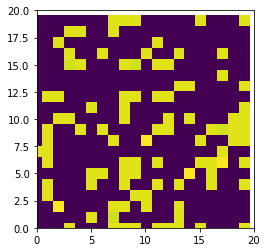

In [22]:
### visualize animation
fig, ax = plt.subplots()

ax.set_xlim((0, width))
ax.set_ylim((0, height))

im = ax.imshow(anim[:,:,0])

def init():
    im.set_data(anim[:,:,0])
    return (im,)

# animation function. This is called sequentially
def animate(i):
    data_slice = anim[:,:,i]
    im.set_data(data_slice)
    return (im,)

# call the animator. blit=True means only re-draw the parts that have changed.
animate = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=iterations, interval=20, blit=False)

HTML(animate.to_html5_video())